### Import Libarary

In [2]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import local_binary_pattern
from skimage.feature import greycoprops
from skimage.feature import greycomatrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

### Fungsi Load Dataset

In [3]:
i = 0
def load_dataset(kelas):
    image = []
    label = []
    global i
    fld = "./dataset/"+kelas      
    if kelas=="skabies":
        f = 'skabies'
    elif kelas=="demodex":
        f = 'demodex'
    elif kelas=="sehat":
        f = 'sehat'

    for filename in os.listdir(fld):
        img = cv2.imread(fld + '/' + filename)
        image.append(img)
        label.append((i,f,filename))
        i+=1
   
    return image,label

### Fungsi Preproses

In [4]:
def pre(data):
    arr_prep = []
    for i in range(len(data)):
        image_rgb = cv2.cvtColor(data[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(image_rgb)
    return arr_prep

In [5]:
def Sharpening(data):
    arr_sharp = []
    for i in range(len(data)):
        sharpen = np.array([[-1,-1,-1],[-1, 9,-1],[-1,-1,-1]])
        imgsharp = cv2.filter2D(data[i],-1,sharpen)
        arr_sharp.append(imgsharp)
    return arr_sharp

In [6]:
def clahe(data):
    arr_clahe = []
    for i in range(len(data)):
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        cl1 = clahe.apply(data[i])
        arr_clahe.append(cl1)
    return arr_clahe

### Fungsi Ekstraksi Ciri

In [7]:
def extractLBP(p,r,img):
    
    n_points = p
    radius = r
    
    lbp = local_binary_pattern(img, n_points, radius, method='uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins))
    hist = hist.astype("float")                         
    hist /= (hist.sum() + (1e-7))
    return hist
def featureExtraction(p,r,arr):
    arr_feature=[]
    for i in range(np.shape(arr)[0]):
        arr_feature.append(extractLBP(p,r,arr[i]))
    return arr_feature

### Cross Validation

In [8]:
def randomize(arrayA,arrayB):
    randPerm = np.random.permutation(np.shape(arrayA)[0])
    newArrayA = []
    newArrayB = []
    for i in range(0,len(randPerm)):
        newArrayA.append(arrayA[randPerm[i]])
        newArrayB.append(arrayB[randPerm[i]])
    return np.array(newArrayA),np.array(newArrayB)

In [9]:
def KFoldCrossValidation(K,X,y):
    scores = []
    X,y = randomize(X,y)
#     clf = RandomForestClassifier()
    clf = RandomForestClassifier()
    cv = StratifiedKFold(n_splits=K) 
    for train_index, test_index in cv.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
#         scores.append(accuracy_score(y_test, clf.predict(X_test)))
        scores.append(cross_val_score(clf, X, y,cv=cv))
#     scores.append(cross_val_score(clf, X, y,cv=cv)) 
    return np.mean(scores)

#### Load dataset

In [10]:
skabies,l_skabies = load_dataset("skabies")
lain,l_lain = load_dataset("demodex")

In [14]:
# # width, height = skabies[0].size
# print(skabies[1].shape)

(95, 159, 3)


#### Ubah menjadi grayscale

In [15]:
pre_skabies = pre(skabies)
pre_lain = pre(lain)

In [116]:

# # 0 50 61 56
# cv2.imshow('image',skabies[107])
# cv2.waitKey(0)

-1

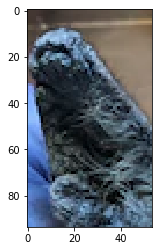

In [132]:
# plt.imshow(skabies[63])
# plt.show()

In [113]:
# import pandas as pd
# print(pre_skabies[1].shape)
# lala = pre_skabies[1].shape
# print(lala[0])
# size = pd.DataFrame(columns=['Size'])
# for i in range(len(pre_skabies)):
#     lala = pre_skabies[i].shape
#     s = str(lala[0])+' X '+str(lala[1])
#     size.loc[i] = [s]
# #     print(i)
# size.head()
# print(size.loc[56])

(95, 159)
95
Size    125 X 147
Name: 56, dtype: object


#### Pembagian data train dan data test

In [230]:
skabies_train, skabies_test, label_skabies, label_t_skabies = train_test_split(pre_skabies, l_skabies, test_size=0.4, random_state=100)
lain_train, lain_test, label_lain, label_t_lain = train_test_split(pre_lain, l_lain, test_size=0.4, random_state=100)

#### Penggabungan dua kelas untuk data train 

In [231]:
combineImage = np.concatenate((skabies_train,lain_train))
combineLabel = np.concatenate((label_skabies,label_lain))

In [232]:
print(np.array(combineImage).shape)
print(np.array(combineLabel).shape)

(140,)
(140, 3)


#### Penggabungan dua kelas untuk data test

In [233]:
combineImage_test = np.concatenate((skabies_test,lain_test))
combineLabel_test = np.concatenate((label_t_skabies,label_t_lain))

### TRAINING

In [234]:
X_train, X_test, y_train, y_test = train_test_split(combineImage, combineLabel, test_size=0.4, random_state=100)

In [1]:
print(np.array(X_train).shape())

NameError: name 'np' is not defined

In [235]:
from skimage.feature import local_binary_pattern
def LocalBinaryPattern(img, p, r):
    lbp = local_binary_pattern(img, p, r, method = 'uniform')
    n_bins = int(lbp.max() + 1)
    (hist, _) = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density = True)
    return hist, lbp

#### Pengujian Parameter ULBP

In [236]:
from sklearn.metrics import precision_score,f1_score,recall_score
import pandas as pd
ULBP = pd.DataFrame(columns=['P','R','Train','Precision','Recall','F1-score','K-fold','Test'])
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
idx = 0
acc_test = 0
maxy = 0
# p = 0
# r = 0
for i in(range(5)):
#     print(i)
    idx = idx+1
    f_X_train = featureExtraction(4,i+1,X_train)
    f_X_test = featureExtraction(4,i+1,X_test)
    img_train = np.concatenate((f_X_train,f_X_test))
    lili = featureExtraction(4,i+1,combineImage_test)
#     X_train, X_test, y_train, y_test = train_test_split(lala, combineLabel, test_size=0.4, random_state=100)
    clf.fit(f_X_train, y_train[:,1])
    result = clf.predict(f_X_test)
#     print("Akurasi train ULBP (Random Forest)(P = ",4," R = ", i+1, ") :", accuracy_score(y_test[:,1], result) * 100)
    acc = round(accuracy_score(y_test[:,1], result) * 100,2)
    a = KFoldCrossValidation(10,img_train,combineLabel[:,1])
    a = round(a * 100)
    if ( a > maxy):
        maxy = a
        point = 4
        radius = i+1
#     print('Hasil KFlod : ',a * 100)
    p = round(precision_score(y_test[:,1], result, average='weighted') *100)
    f = round(f1_score(y_test[:,1], result, average='weighted') * 100)
    r = round(recall_score(y_test[:,1], result, average='weighted') * 100)
    clf.fit(img_train, combineLabel[:,1])
    result_test = clf.predict(lili)
# #     print("Akurasi Random Forest:", accuracy_score(combineLabel_test[:,1], result_test) * 100)
    acc_test = round(accuracy_score(combineLabel_test[:,1], result_test) * 100,2)
    ULBP.loc[idx] = [int(4),int(i+1),acc,p,r,f,a,acc_test]
#     ULBP.append(df2)

print('------------ // -----------')
    
for i in(range(5)):
#     print(i)
    idx = idx + 1
    f_X_train = featureExtraction(8,i+1,X_train)
    f_X_test = featureExtraction(8,i+1,X_test)
    img_train = np.concatenate((f_X_train,f_X_test))
    lili = featureExtraction(8,i+1,combineImage_test)
#     X_train, X_test, y_train, y_test = train_test_split(lala, combineLabel, test_size=0.4, random_state=100)
    clf.fit(f_X_train, y_train[:,1])
    result = clf.predict(f_X_test)
#     print("Akurasi train ULBP (Random Forest)(P = ",8," R = ", i+1, ") :", accuracy_score(y_test[:,1], result) * 100)
    a = KFoldCrossValidation(10,img_train,combineLabel[:,1])
    a = round(a * 100)
    if ( a > maxy):
        maxy = a
        point = 8
        radius = i+1
#     print('Hasil KFlod : ',a * 100)
    clf.fit(img_train, combineLabel[:,1])
    result_test = clf.predict(lili)
# #     print("Akurasi Random Forest:", accuracy_score(combineLabel_test[:,1], result_test) * 100)
    acc = round(accuracy_score(y_test[:,1], result) * 100)
    acc_test = round(accuracy_score(combineLabel_test[:,1], result_test) * 100,2)
    p = round(precision_score(y_test[:,1], result, average='weighted') * 100)
    f = round(f1_score(y_test[:,1], result, average='weighted') * 100)
    r = round(recall_score(y_test[:,1], result, average='weighted') * 100)
    ULBP.loc[idx] = [int(8),int(i+1),acc,p,r,f,a,acc_test]

print('------------ // -----------')
    
for i in(range(5)):
#     print(i)
    idx = idx + 1
    f_X_train = featureExtraction(16,i+1,X_train)
    f_X_test = featureExtraction(16,i+1,X_test)
    img_train = np.concatenate((f_X_train,f_X_test))
    lili = featureExtraction(16,i+1,combineImage_test)
#     X_train, X_test, y_train, y_test = train_test_split(lala, combineLabel, test_size=0.4, random_state=100)
    clf.fit(f_X_train, y_train[:,1])
    result = clf.predict(f_X_test)
#     print("Akurasi train ULBP (Random Forest)(P = ",16," R = ", i+1, ") :", accuracy_score(y_test[:,1], result) * 100)
    a = KFoldCrossValidation(10,img_train,combineLabel[:,1])
    a = round(a * 100)
    if ( a > maxy):
        maxy = a
        point = 16
        radius = i+1
#     print('Hasil KFlod : ',a * 100)
    clf.fit(img_train, combineLabel[:,1])
    result_test = clf.predict(lili)
#     print("Akurasi Random Forest:", accuracy_score(combineLabel_test[:,1], result_test) * 100)
    acc = round(accuracy_score(y_test[:,1], result) * 100)
    acc_test = round(accuracy_score(combineLabel_test[:,1], result_test) * 100,2)
    p = round(precision_score(y_test[:,1], result, average='weighted') * 100)
    f = round(f1_score(y_test[:,1], result, average='weighted') * 100)
    r = round(recall_score(y_test[:,1], result, average='weighted') * 100)
    ULBP.loc[idx] = [int(16),int(i+1),acc,p,r,f,a,acc_test]
    
print(' --------- DONE -----------')

------------ // -----------
------------ // -----------
 --------- DONE -----------


In [237]:
ULBP

,P,R,Train,Precision,Recall,F1-score,K-fold,Test
1,4.0,1.0,55.36,55.0,55.0,55.0,52.0,52.13
2,4.0,2.0,58.93,59.0,59.0,59.0,52.0,54.26
3,4.0,3.0,53.57,52.0,54.0,53.0,52.0,46.81
4,4.0,4.0,46.43,46.0,46.0,46.0,52.0,53.19
5,4.0,5.0,55.36,56.0,55.0,56.0,52.0,51.06
6,8.0,1.0,54.00,54.0,54.0,54.0,52.0,46.81
7,8.0,2.0,59.00,59.0,59.0,59.0,52.0,44.68
8,8.0,3.0,68.00,68.0,68.0,68.0,52.0,54.26
9,8.0,4.0,50.00,51.0,50.0,50.0,52.0,51.06
10,8.0,5.0,68.00,68.0,68.0,68.0,52.0,51.06


#### Nilai akurasi, point, dan radius maksimal

In [238]:
print(maxy,point,radius)

52.0 4 1


#### Pengujian preproses

In [187]:
# radius = 5
pre_train = Sharpening(X_train)
pre_test = Sharpening(X_test)

In [188]:
f_X_train = featureExtraction(point,radius,pre_train)
f_X_test = featureExtraction(point,radius,pre_test)
clf.fit(f_X_train, y_train[:,1])
result = clf.predict(f_X_test)
p = round(precision_score(y_test[:,1], result, average='weighted') * 100)
f = round(f1_score(y_test[:,1], result, average='weighted') * 100)
r = round(recall_score(y_test[:,1], result, average='weighted') * 100)
print("Akurasi train ULBP (Random Forest)(P = ",16," R = ", 3, ") :", round(accuracy_score(y_test[:,1], result) * 100,2))
img_train = np.concatenate((f_X_train,f_X_test))
a = KFoldCrossValidation(10,img_train,combineLabel[:,1])
a = round(a * 100)
print(a,p,f,r)

Akurasi train ULBP (Random Forest)(P =  16  R =  3 ) : 41.07
52.0 17.0 24.0 41.0


In [189]:
pre_train = clahe(X_train)
pre_test = clahe(X_test)

In [190]:
f_X_train = featureExtraction(point,radius,pre_train)
f_X_test = featureExtraction(point,radius,pre_test)
clf.fit(f_X_train, y_train[:,1])
result = clf.predict(f_X_test)
print("Akurasi train ULBP (Random Forest)(P = ",16," R = ", 3, ") :", accuracy_score(y_test[:,1], result) * 100)
p = round(precision_score(y_test[:,1], result, average='weighted') * 100)
f = round(f1_score(y_test[:,1], result, average='weighted') * 100)
r = round(recall_score(y_test[:,1], result, average='weighted') * 100)
img_train = np.concatenate((f_X_train,f_X_test))
a = KFoldCrossValidation(10,img_train,combineLabel[:,1])
a = round(a * 100)
print(a,p,f,r)

Akurasi train ULBP (Random Forest)(P =  16  R =  3 ) : 41.07142857142857
52.0 17.0 24.0 41.0


In [191]:
pre_train = clahe(X_train)
pre_test = clahe(X_test)
pre_train = Sharpening(pre_train)
pre_test = Sharpening(pre_test)

In [192]:
f_X_train = featureExtraction(point,radius,pre_train)
f_X_test = featureExtraction(point,radius,pre_test)
clf.fit(f_X_train, y_train[:,1])
result = clf.predict(f_X_test)
print("Akurasi train ULBP (Random Forest)(P = ",16," R = ", 3, ") :", accuracy_score(y_test[:,1], result) * 100)
p = round(precision_score(y_test[:,1], result, average='weighted') * 100)
f = round(f1_score(y_test[:,1], result, average='weighted') * 100)
r = round(recall_score(y_test[:,1], result, average='weighted') * 100)
img_train = np.concatenate((f_X_train,f_X_test))
a = KFoldCrossValidation(10,img_train,combineLabel[:,1])
a = round(a * 100)
print(a,p,f,r)

Akurasi train ULBP (Random Forest)(P =  16  R =  3 ) : 41.07142857142857
52.0 17.0 24.0 41.0


In [193]:
pre_train = Sharpening(X_train)
pre_test = Sharpening(X_test)
pre_train = clahe(pre_train)
pre_test = clahe(pre_test)

In [194]:
f_X_train = featureExtraction(point,radius,pre_train)
f_X_test = featureExtraction(point,radius,pre_test)
clf.fit(f_X_train, y_train[:,1])
result = clf.predict(f_X_test)
print("Akurasi train ULBP (Random Forest)(P = ",16," R = ", 3, ") :", accuracy_score(y_test[:,1], result) * 100)
p = round(precision_score(y_test[:,1], result, average='weighted') * 100)
f = round(f1_score(y_test[:,1], result, average='weighted') * 100)
r = round(recall_score(y_test[:,1], result, average='weighted') * 100)
img_train = np.concatenate((f_X_train,f_X_test))
a = KFoldCrossValidation(10,img_train,combineLabel[:,1])
a = round(a * 100)
print(a,p,f,r)

Akurasi train ULBP (Random Forest)(P =  16  R =  3 ) : 41.07142857142857
52.0 17.0 24.0 41.0


In [195]:
img_train = np.concatenate((f_X_train,f_X_test))

#### Tuning Hyperparameter Random Forest

In [49]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 10, 15, 25, 30, 40, 45, 50, 60, 70, 80, 95, 100, None]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
# max_features = ['auto','log2',None,3,6,8,10]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

forest = RandomForestClassifier(n_estimators=100, random_state=60)
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(img_train,combineLabel[:,1])
from pprint import pprint
pprint(bestF.best_estimator_.get_params())

Fitting 3 folds for each of 1500 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed: 29.2min finished


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 60,
 'verbose': 0,
 'warm_start': False}


### Training Model

In [239]:
pre_train = clahe(X_train)
pre_test = clahe(X_test)
pre_train = Sharpening(pre_train)
pre_test = Sharpening(pre_test)
# pre_train = X_train
# pre_test = X_test

In [240]:
def KFoldCrossValidation(K,X,y):
    scores = []
    X,y = randomize(X,y)
#     clf = RandomForestClassifier()
    clf = RandomForestClassifier(bootstrap = True, 
                             max_depth = 5,
                             min_samples_leaf = 1,
                             min_samples_split = 100, 
                             n_estimators = 100)
    cv = StratifiedKFold(n_splits=K) 
    for train_index, test_index in cv.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
#         scores.append(accuracy_score(y_test, clf.predict(X_test)))
        scores.append(cross_val_score(clf, X, y,cv=cv))
#     scores.append(cross_val_score(clf, X, y,cv=cv)) 
    return np.mean(scores)

In [249]:
clf = RandomForestClassifier(bootstrap = True, 
                             max_depth = 5,
                             min_samples_leaf = 1,
                             min_samples_split = 100, 
                             n_estimators = 100,)
f_X_train = featureExtraction(point,radius,pre_train)
f_X_test = featureExtraction(point,radius,pre_test)
clf.fit(f_X_train, y_train[:,1])
result = clf.predict(f_X_test)
print("Akurasi train ULBP (Random Forest)(P = ",16," R = ", radius, ") :", accuracy_score(y_test[:,1], result) * 100)
p = round(precision_score(y_test[:,1], result, average='weighted') * 100)
f = round(f1_score(y_test[:,1], result, average='weighted') * 100)
r = round(recall_score(y_test[:,1], result, average='weighted') * 100)
img_train = np.concatenate((f_X_train,f_X_test))
a = KFoldCrossValidation(10,img_train,combineLabel[:,1])
a = round(a * 100)
print(a,p,f,r)

Akurasi train ULBP (Random Forest)(P =  16  R =  1 ) : 41.07142857142857
52.0 17.0 24.0 41.0


In [ ]:
coba = clf.predict()

In [250]:
img_train = np.concatenate((f_X_train,f_X_test))

In [251]:
# pre_train = clahe(combineImage_test)
# pre_test = clahe(combineImage_test)
# pre_train = Sharpening(pre_train)
# pre_test = Sharpening(pre_test)
f_test = featureExtraction(point,radius,combineImage_test)
clf.fit(img_train, combineLabel[:,1])
result_test = clf.predict(f_test)
acc_test = round(accuracy_score(combineLabel_test[:,1], result_test) * 100,2)
print(acc_test)

52.13


In [ ]:
# print(clf)
import pickle
#buat save model
f = "modelULBP.pkl"
with open(f, 'wb') as file:
    pickle.dump(clf, file)
import numpy as np

Feature: 0, Score: 0.13604
Feature: 1, Score: 0.14341
Feature: 2, Score: 0.17418
Feature: 3, Score: 0.20058
Feature: 4, Score: 0.15863
Feature: 5, Score: 0.18717


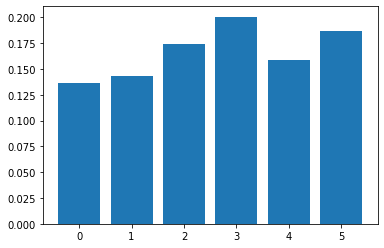

In [258]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X,y=shuffle(f_test,combineLabel_test[:,1],random_state=220)

# define the model
model = RandomForestClassifier(n_estimators = 200, random_state=0)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [254]:
print(result_test)

['demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex'
 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex'
 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex'
 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex'
 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex'
 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex'
 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex'
 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex'
 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex'
 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex'
 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex'
 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex'
 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex' 'demodex'
 'demodex' 'demodex' 'demodex']


In [253]:
import pickle
# buat load
f =  "modelULBP.pkl"
with open(f, 'rb') as file:
    m = pickle.load(file)

In [255]:
# coba = clf.predict(f_test[0])

              precision    recall  f1-score   support

     demodex       0.52      1.00      0.69        49
     skabies       0.00      0.00      0.00        45

   micro avg       0.52      0.52      0.52        94
   macro avg       0.26      0.50      0.34        94
weighted avg       0.27      0.52      0.36        94



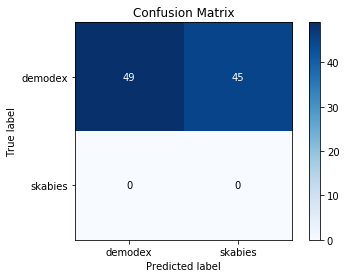

1.0 0.69 0.52


In [246]:
print(classification_report(combineLabel_test[:,1],result_test))
plot_confusion_matrix(result_test,combineLabel_test[:,1] , normalize=False)
plt.show()
from sklearn.metrics import precision_score,f1_score,recall_score
p = round(precision_score(result_test,combineLabel_test[:,1], average='weighted'),2)
f = round(f1_score(result_test,combineLabel_test[:,1], average='weighted'),2)
r = round(recall_score(result_test,combineLabel_test[:,1], average='weighted'),2)
print(p,f,r)

In [103]:
# print(clf)
import pickle
#buat save model
f = "modelULBP.pkl"
with open(f, 'wb') as file:
    pickle.dump(clf, file)

In [104]:
import pickle
# buat load
f =  "modelULBP.pkl"
with open(f, 'rb') as file:
    m = pickle.load(file)

In [110]:
from keras.preprocessing import image
x =  cv2.imread("C:/Users/Z & N/Bismillah TA/1 citra/scabies.png")
# x = np.expand_dims(x, axis=0)
# x.shape
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
coba = m.predict(x)

ModuleNotFoundError: No module named 'keras'

In [247]:
S = np.asarray(np.where(result_test != combineLabel_test[:,1])) #Mencari data yang salah terprediksi
print(np.array(S).shape)

(1, 45)


In [ ]:
S

In [117]:
pre_train = clahe(pre_skabies)
pre_train = Sharpening(pre_train)
# pre_train = X_train

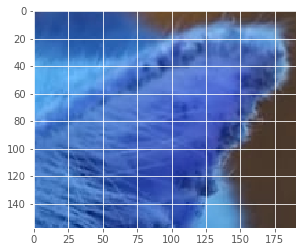

In [148]:
plt.imshow(skabies[108])
plt.show()

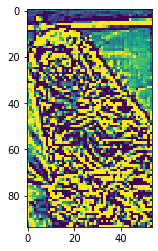

In [135]:
plt.imshow(pre_train[63])
plt.show()

In [120]:
f_X_train = featureExtraction(16,1,pre_train)

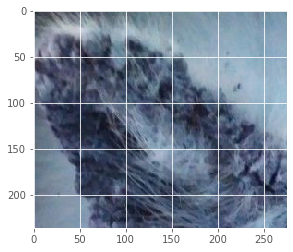

(array([10.,  4.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([0.02795069, 0.0431849 , 0.05841911, 0.07365331, 0.08888752,
        0.10412173, 0.11935593, 0.13459014, 0.14982435, 0.16505855,
        0.18029276]),
 <a list of 10 Patch objects>)

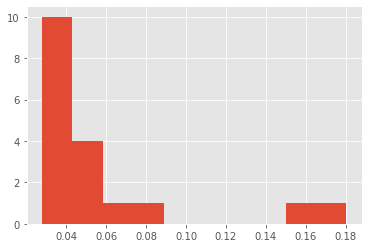

In [162]:
plt.imshow(skabies[0])
plt.show()
plt.hist(f_X_train[0])

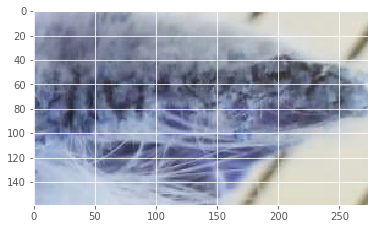

(array([10.,  3.,  3.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([0.02478997, 0.04131892, 0.05784786, 0.07437681, 0.09090575,
        0.1074347 , 0.12396364, 0.14049259, 0.15702153, 0.17355048,
        0.19007942]),
 <a list of 10 Patch objects>)

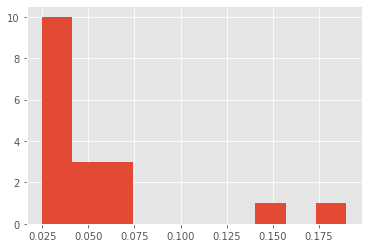

In [164]:
plt.imshow(skabies[50])
plt.show()
plt.hist(f_X_train[50])

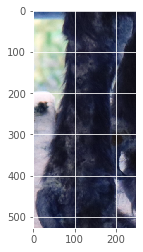

(array([14.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([0.02741897, 0.04661073, 0.06580249, 0.08499425, 0.104186  ,
        0.12337776, 0.14256952, 0.16176128, 0.18095303, 0.20014479,
        0.21933655]),
 <a list of 10 Patch objects>)

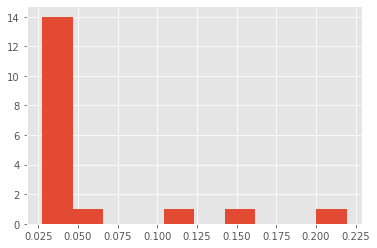

In [159]:
n = 10
plt.imshow(skabies[n])
plt.show()
plt.hist(f_X_train[n])

In [ ]:
#63 0 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


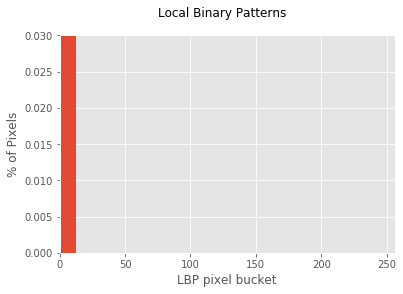

In [145]:
plt.style.use("ggplot")
(fig, ax) = plt.subplots()
fig.suptitle("Local Binary Patterns")
plt.ylabel("% of Pixels")
plt.xlabel("LBP pixel bucket")

features = f_X_train[0]
cv2.imshow("LBP", features.astype("uint8"))
cv2.waitKey(0)

ax.hist(features.ravel(), normed=True, bins=20, range=(0, 256))
ax.set_xlim([0, 256])
ax.set_ylim([0, 0.030])
plt.show()

In [142]:
features = f_X_train[0]
cv2.imshow("LBP", features.astype("uint8"))
cv2.waitKey(0)

-1

In [144]:
ax.hist(features.ravel(), normed=True, bins=20, range=(0, 256))
ax.set_xlim([0, 256])
ax.set_ylim([0, 0.030])
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
